# Identifying Amino Acid Patterns via Phage Display + NGS + Machine Learning
2017/05/10 by Andrew Chang

In [6]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Image

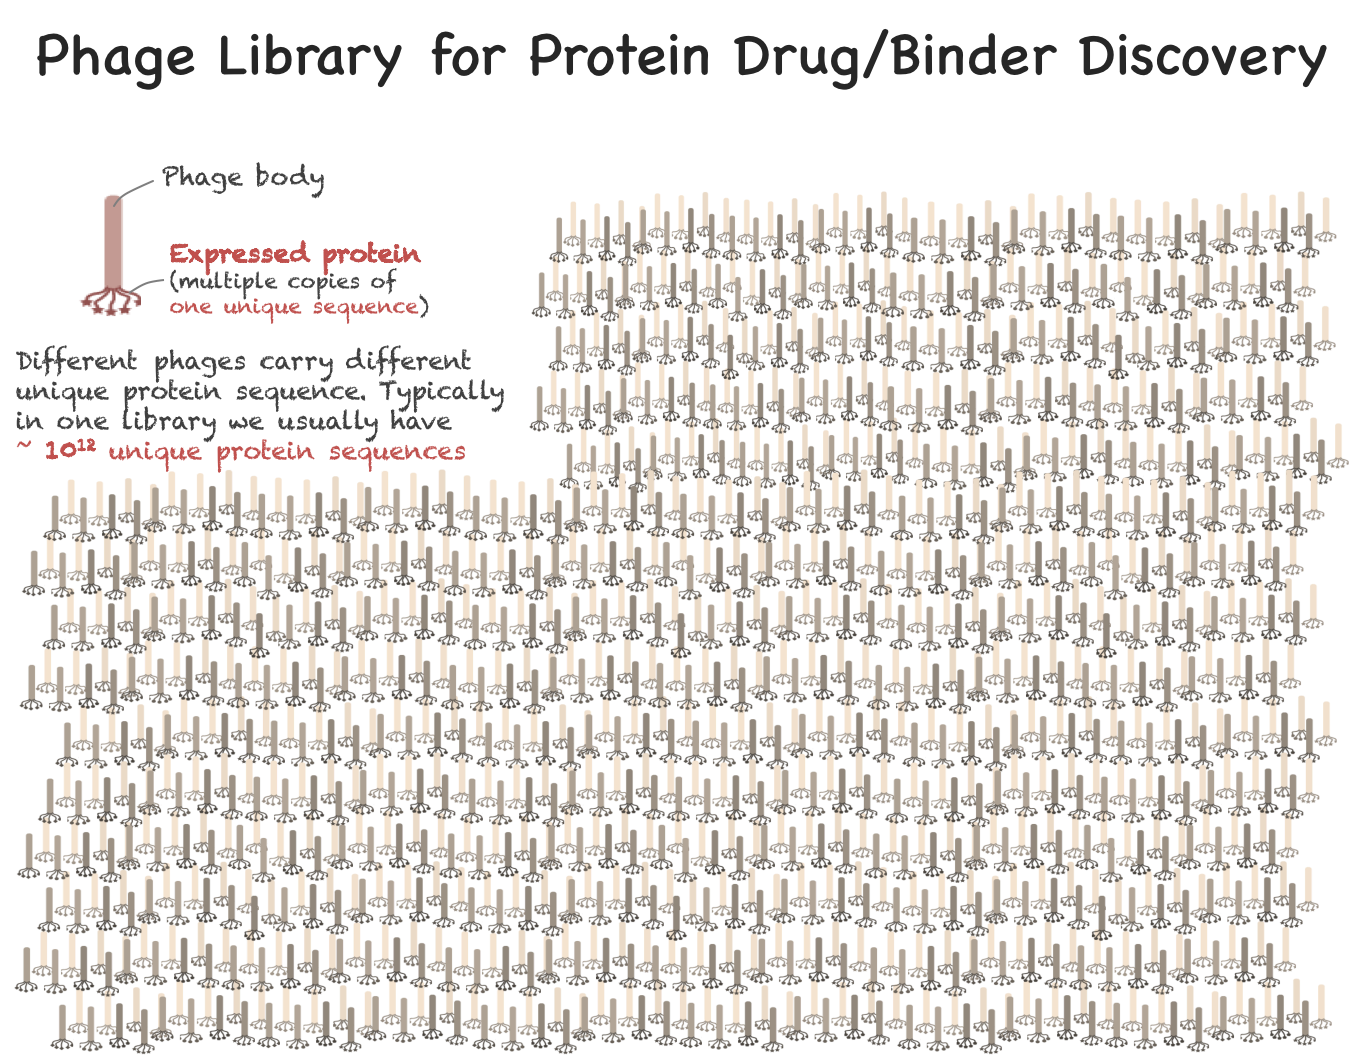

In [7]:
Image('~/F1.png')

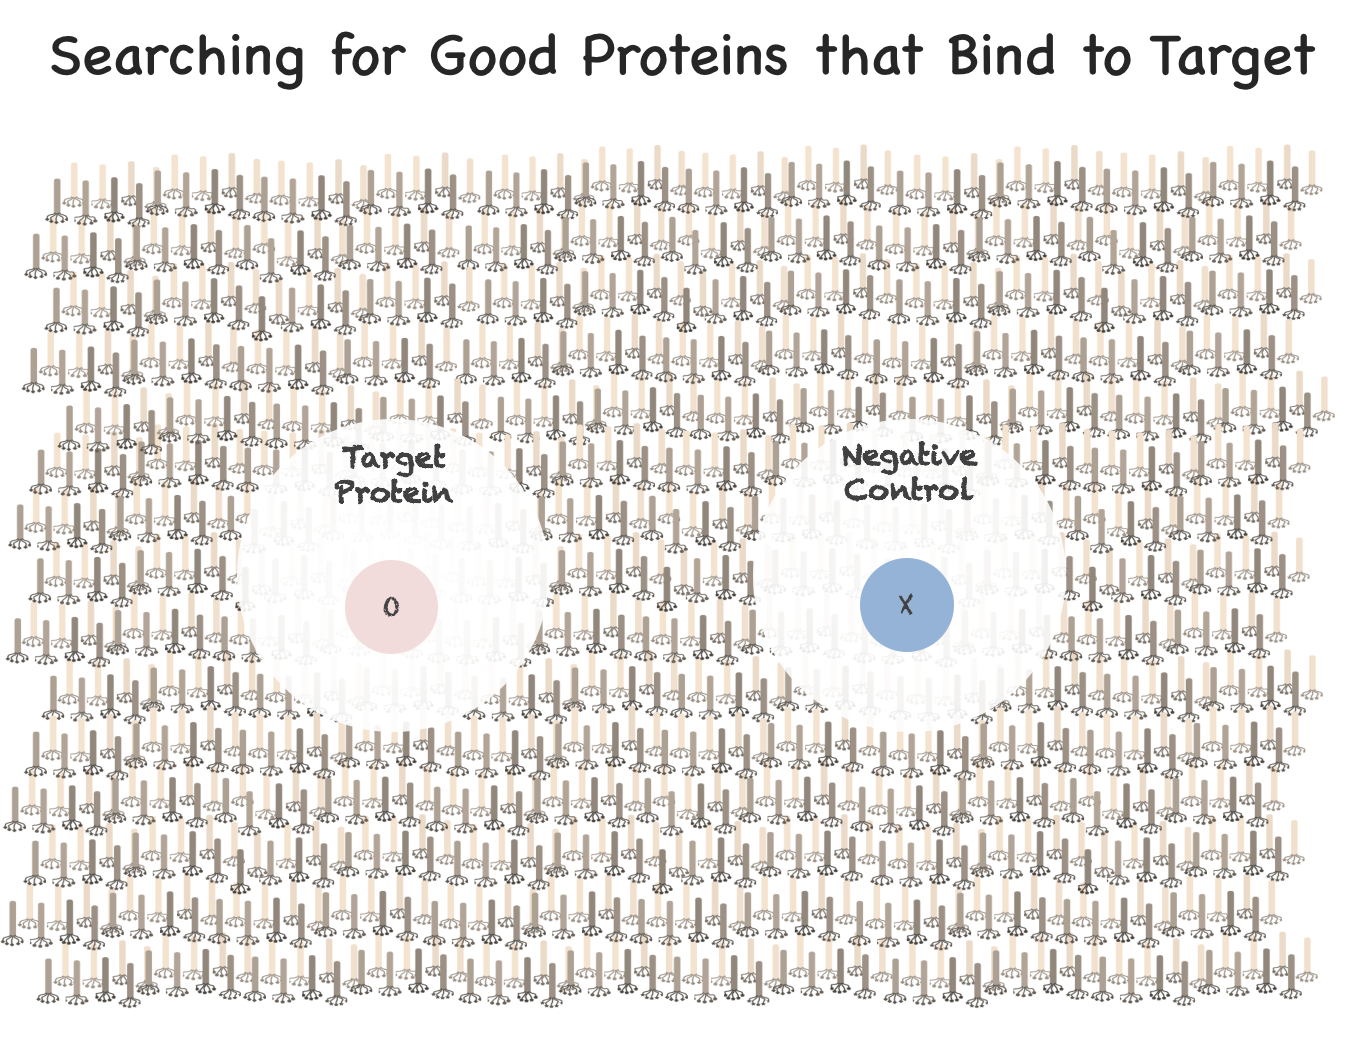

In [8]:
Image('~/F2.png')

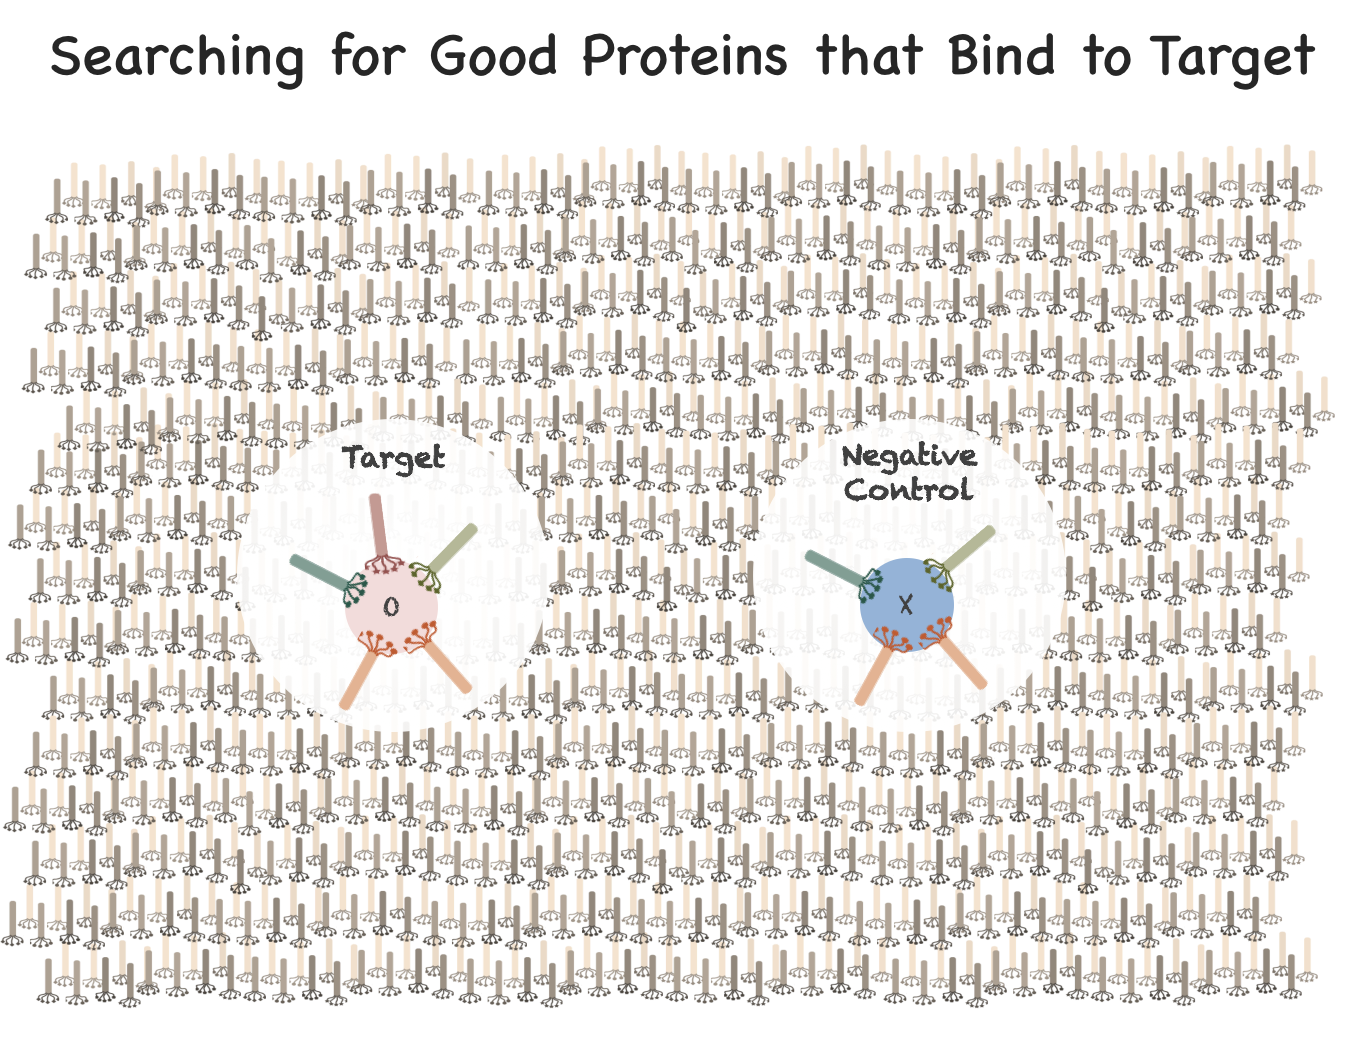

In [9]:
Image('~/F3.png')

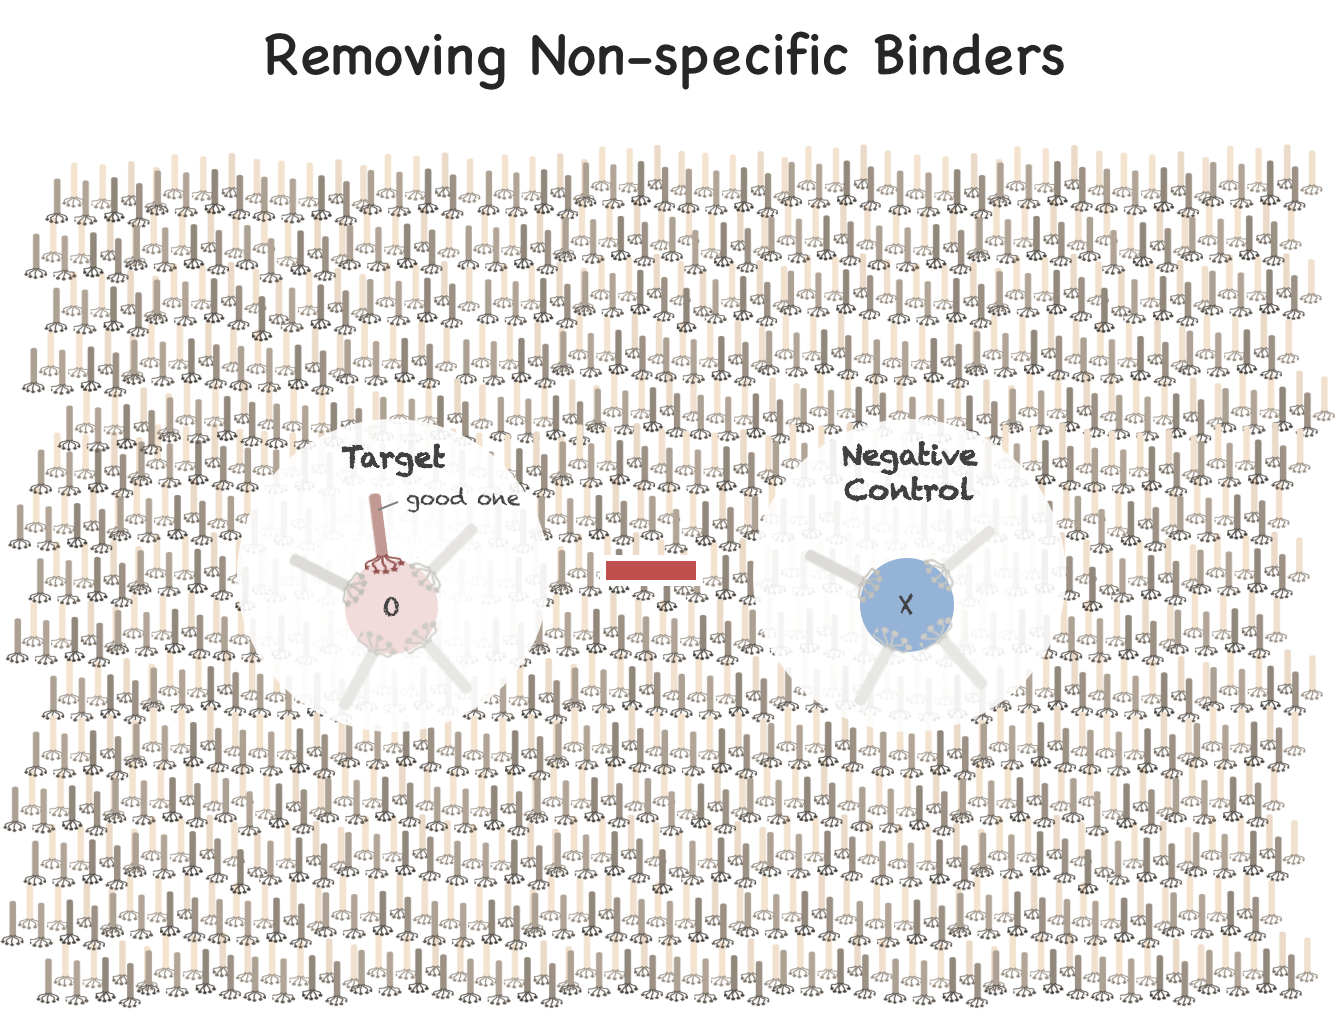

In [12]:
Image('~/F4.png')

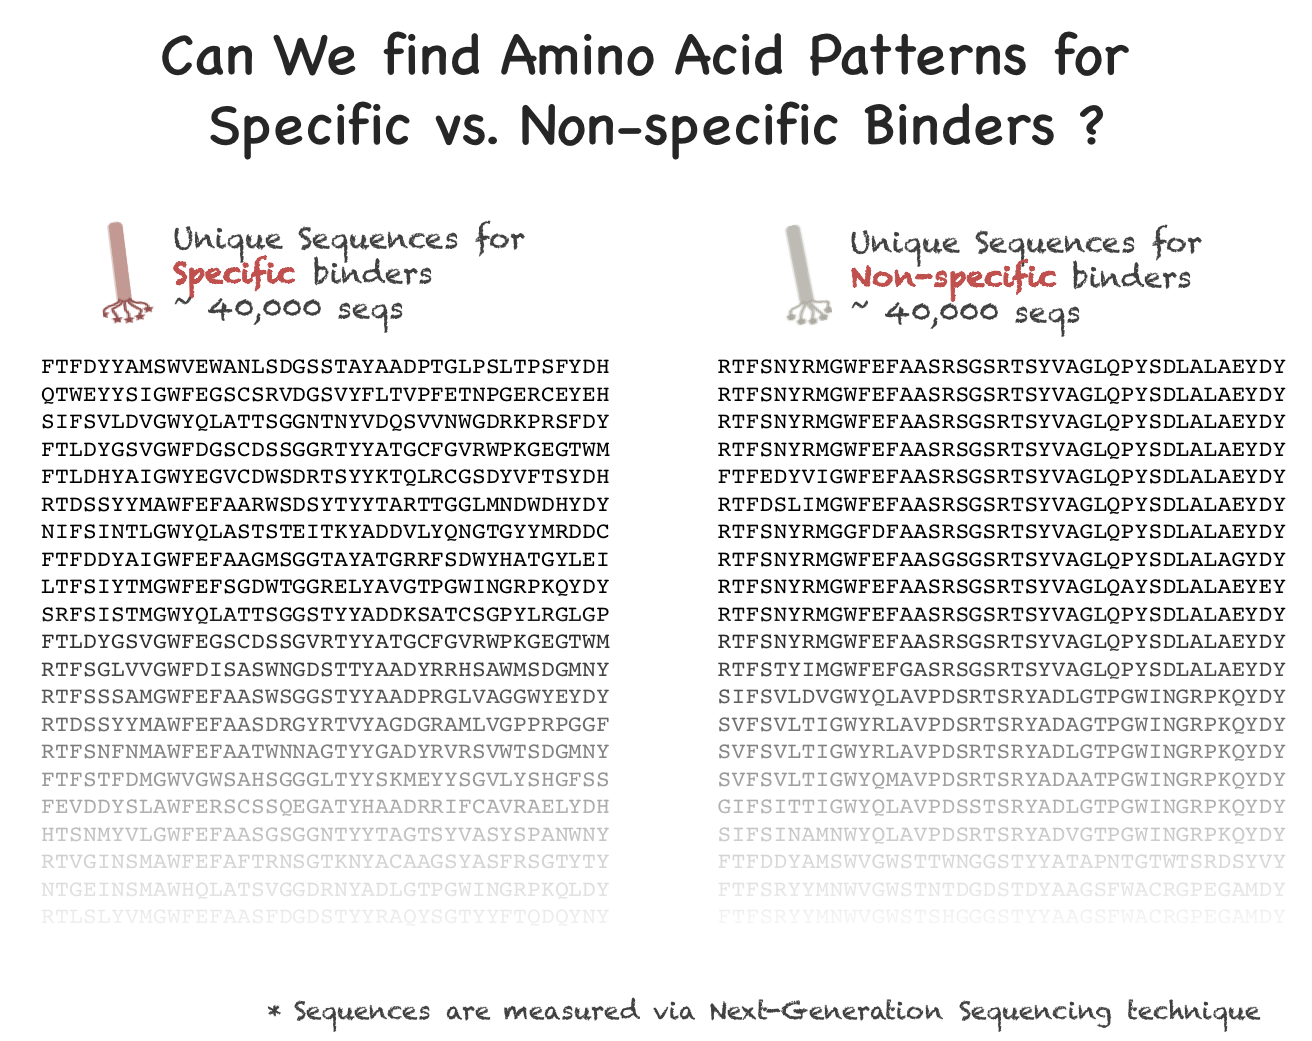

In [13]:
Image('~/F5.png')

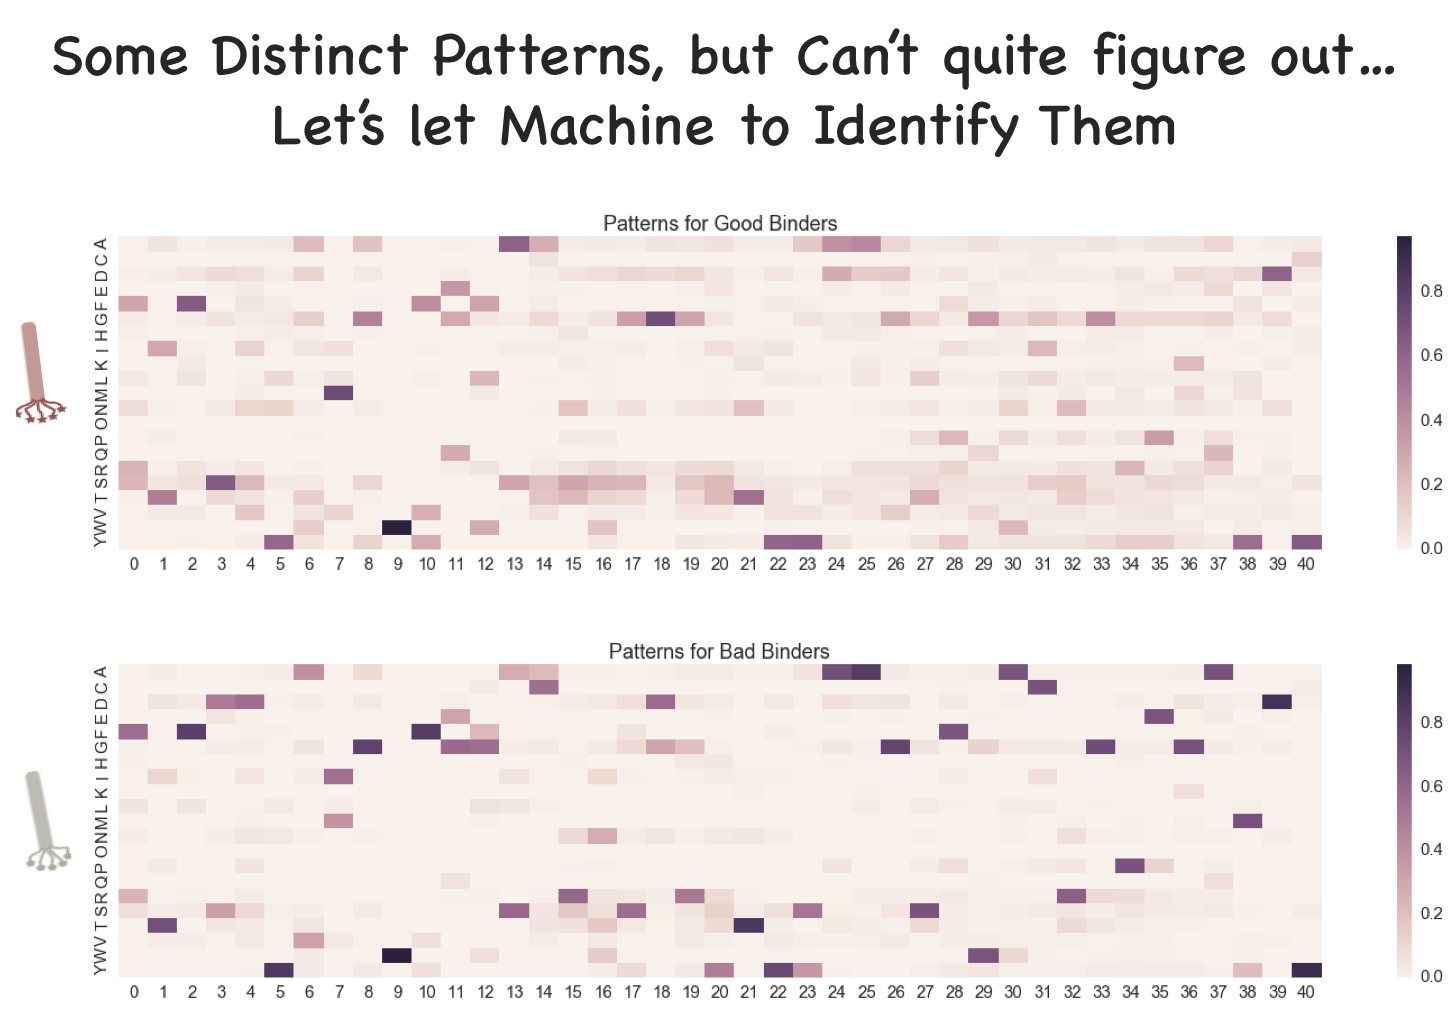

In [14]:
Image('~/F6.png')

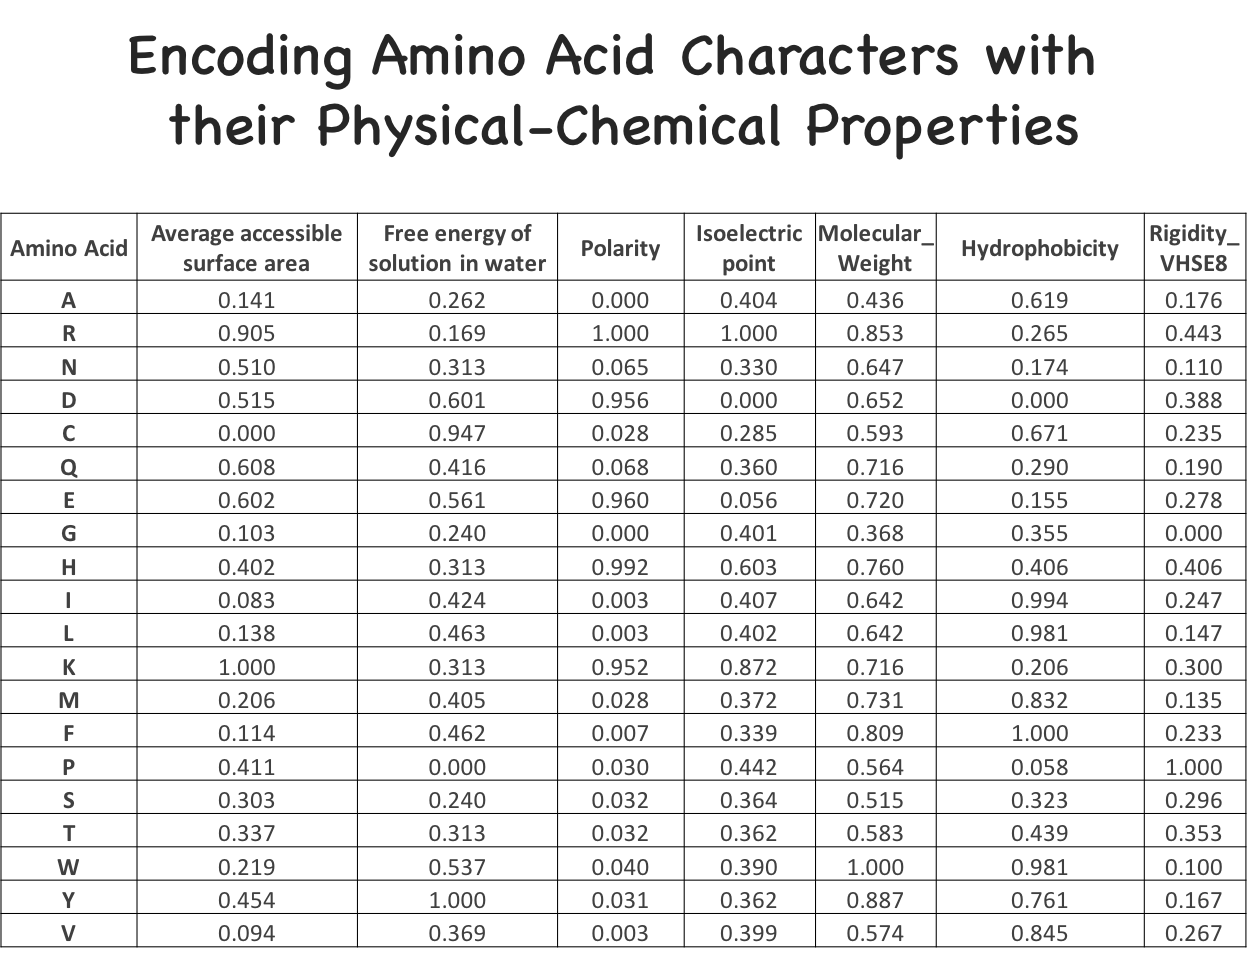

In [29]:
Image('~/F7.png')

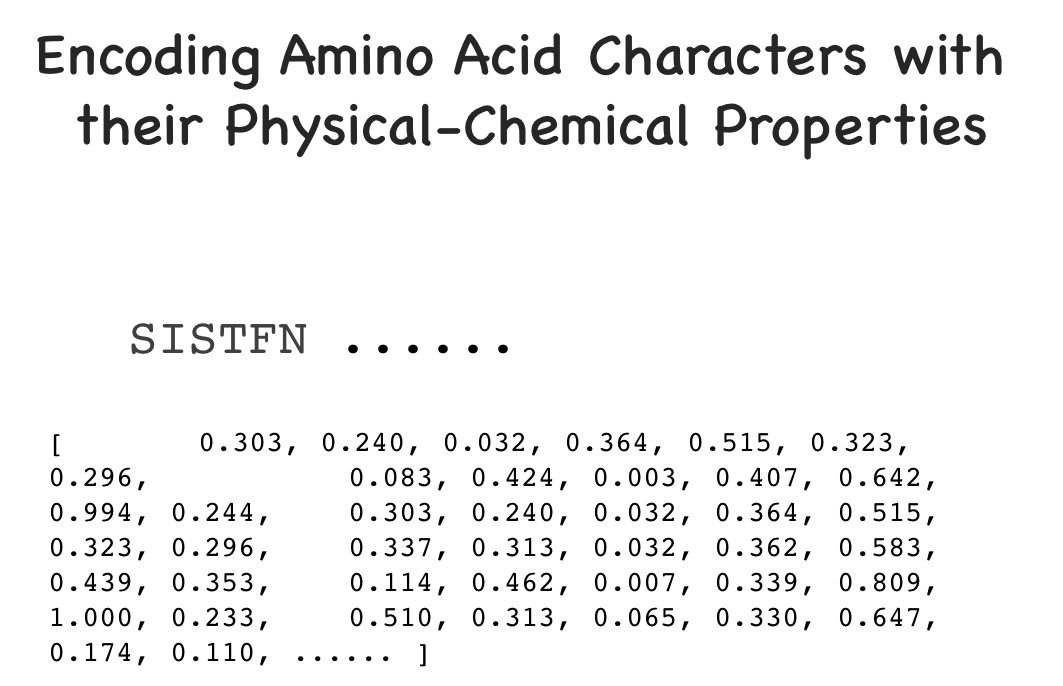

In [25]:
Image('~/F8.png', width=500, height=500)

In [30]:
df = pd.read_csv('~/demo_seq.csv')

In [36]:
# check the size of the data
print "size of df:", df.shape

size of df: (79483, 7)


## Physical-Chemical Properties of Amino Acids

In [32]:
aaindex_7 = pd.read_csv('~/AAIndex_Andrew_choice.csv', header=0, index_col=0)
display(aaindex_7)

Average accessible surface area  Free energy of solution in water  \
Amino Acid                                                                      
A                                     0.141                             0.262   
R                                     0.905                             0.169   
N                                     0.510                             0.313   
D                                     0.515                             0.601   
C                                     0.000                             0.947   
Q                                     0.608                             0.416   
E                                     0.602                             0.561   
G                                     0.103                             0.240   
H                                     0.402                             0.313   
I                                     0.083                             0.424   
L                                     0.138                             0.463   
K                                     1.000                             0.313   
M                                     0.206                             0.405   
F                                     0.114                             0.462   
P                                     0.411                             0.000   
S                                     0.303                             0.240   
T                                     0.337                             0.313   
W                                     0.219                             0.537   
Y                                     0.454                             1.000   
V                                     0.094                             0.369   
O                                     0.000                             0.000   

            Polarity  Isoelectric point  Molecular_Weight  Hydrophobicity  \
Amino Acid                                                                  
A              0.000              0.404          0.436273        0.619355   
R              1.000              1.000          0.852960        0.264516   
N              0.065              0.330          0.646918        0.174194   
D              0.956              0.000          0.651765        0.000000   
C              0.028              0.285          0.593253        0.670968   
Q              0.068              0.360          0.715615        0.290323   
E              0.960              0.056          0.720413        0.154839   
G              0.000              0.401          0.367576        0.354839   
H              0.992              0.603          0.759732        0.406452   
I              0.003              0.407          0.642315        0.993548   
L              0.003              0.402          0.642315        0.980645   
K              0.952              0.872          0.715811        0.206452   
M              0.028              0.372          0.730598        0.832258   
F              0.007              0.339          0.808843        1.000000   
P              0.030              0.442          0.563727        0.058065   
S              0.032              0.364          0.514567        0.322581   
T              0.032              0.362          0.583264        0.438710   
W              0.040              0.390          1.000000        0.980645   
Y              0.031              0.362          0.887186        0.761290   
V              0.003              0.399          0.573618        0.845161   
O              0.000              0.000          0.000000        0.000000   

            Rigidity_VHSE8  
Amino Acid                  
A                 0.175510  
R                 0.442857  
N                 0.110204  
D                 0.387755  
C                 0.234694  
Q                 0.189796  
E                 0.277551  
G                 0.000000  
H                 0.406122  
I                 0.246939  
L                 0.146939  

## Protein Sequence Encoding
Turn strings into numerical numbers so that machine learning algorithm can handel them. 

In [33]:
def generate_seq_ft_lb(s_data_num):
    seqs_num = s_data_num.var_seq 

    # converting aa seq into number as shown in aa_label
    seq_feature = []
    for seq in seqs_num:
        string = pd.Series(list(seq))
        string.reset_index(drop=True, inplace=True) # reset the index for the next step
        for index, charc in enumerate(string):
            string[index] = aaindex_7.loc[charc,:].tolist()

        seq_feature.append(string)

    seq_feature = np.array(seq_feature)
    seq_label = s_data_num.Label.reset_index(drop=True)
    seq_label = np.array(seq_label).astype(int)

    num_total_sample = seq_feature.shape[0]
    num_aa = seq_feature.shape[1]
    num_chemprop = seq_feature.shape[2]
    
    print '%d samples. Each sample has %d features, with %d values per feature.' %(num_total_sample, num_aa, num_chemprop)
    print '%d labels.' %(seq_label.shape[0])
    #print "Feature of the original 1st data: \n", seq_feature[0]
    
    ## reshape it to each sample has 15*11 features. feature 0-10 is aa1, 11-21 is aa2...
    seq_feature = seq_feature.reshape(num_total_sample,num_aa*num_chemprop)
    print ""
    print 'The shape of transformed features', seq_feature.shape
    print "Feature of the original 1st data: \n", seq_feature[0]
    print '====================================================================\n'
    
    return(seq_feature, seq_label, num_aa, num_chemprop)

In [34]:
# feed in the data for encoding
seq_feature, seq_label, num_aa, num_chemprop = generate_seq_ft_lb(df)

79483 samples. Each sample has 41 features, with 7 values per feature.
79483 labels.

The shape of transformed features (79483, 287)
Feature of the original 1st data: 
[0.30299999999999999 0.23999999999999999 0.032000000000000001
 0.36399999999999999 0.51456690999999999 0.322580645 0.29591836700000002
 0.083000000000000004 0.42399999999999999 0.0030000000000000001
 0.40700000000000003 0.64231503700000003 0.99354838700000003
 0.24693877600000003 0.30299999999999999 0.23999999999999999
 0.032000000000000001 0.36399999999999999 0.51456690999999999 0.322580645
 0.29591836700000002 0.33700000000000002 0.313 0.032000000000000001
 0.36200000000000004 0.58326396700000005 0.43870967700000002
 0.35306122400000001 0.114 0.46200000000000002 0.0069999999999999993
 0.33899999999999997 0.80884297099999991 1.0 0.23265306100000002
 0.51000000000000001 0.313 0.065000000000000002 0.33000000000000002
 0.64691769099999996 0.174193548 0.11020408199999999 0.083000000000000004
 0.42399999999999999 0.003000000

## Split Data for Training and Testing

In [24]:
from sklearn.model_selection import GridSearchCV, validation_curve, StratifiedShuffleSplit
from sklearn import metrics
from sklearn.metrics import classification_report

In [25]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # n_splits=1 is equivalent to regular splitter
sss.get_n_splits(seq_feature, seq_label)
for train_index, test_index in sss.split(seq_feature, seq_label):
    features_train, features_test = seq_feature[train_index], seq_feature[test_index]
    labels_train, labels_test = seq_label[train_index], seq_label[test_index]    
    
print "Shape of Feature Train:", features_train.shape
print "Shape of Feature Test :", features_test.shape
print "# Label Train:", len(labels_train)
print "# Label Test :", len(labels_test)

Shape of Feature Train: (63586, 287)
Shape of Feature Test : (15897, 287)
# Label Train: 63586
# Label Test : 15897


## XGBoost Training - 1st Round

In [35]:
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from xgboost import plot_tree

In [36]:
xgbc = XGBClassifier(
    max_depth=10, ## default = 6, range: [1,∞], higher is more likely to overfit
    learning_rate =0.01, # decrease this needs to increase the n_estimator
    n_estimators=2000, # higher value requires lower eta (n_estimators), = number of rounds of boosting (correcting error)
    silent = True,
    objective= 'binary:logistic', # binary:logistic, multi:softmax, multi:softprob
    nthread=-1,
    gamma=0.5,  ## [0,∞]. Larger, harder to split and control model complexity
    min_child_weight=6, ## [0,∞], default = 1, minimum sum of instance weight (hessian) needed in a child, the larger, the more conservative the algorithm will be.
    max_delta_step = 5, ## [0,∞], default = 0, Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced. Set it to value of 1-10 might help control the update
    subsample=0.6, ##(defalut = 1), [0,1] lower this will prevent overfitting
    colsample_bytree=0.8, ## [0,1], subsample ratio of columns when constructing each tree; control overfitting
    colsample_bylevel=1, # [0,1], subsample ratio of columns for each split, in each level
    reg_alpha=0, # default = 0, L1 regularization term on weights, increase this value will make model more conservative
    reg_lambda=1, # default = 1, L2 regularization term on weights, increase this value will make model more conservative.
    scale_pos_weight=5, ## default = 1, Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative cases) / sum(positive cases)
    #base_score=0.5, 
    seed=0,
    missing=None)

In [37]:
# put the feature and label and weight into xgb.DMatrix for xgb.cv
dtrain = xgb.DMatrix(features_train, labels_train)
dtest = xgb.DMatrix(features_test, labels_test)

# get the hyperparamters and add 'num_class' for xgb.cv
param = xgbc.get_params()
#param['num_class'] = len(np.unique(labels_11_train_ds))

In [38]:
# quick training without tuning hyper-parameters to see how good it is
t0 = time() 

xgbc.fit(features_train, labels_train, 
         eval_set = [(features_test, labels_test)], eval_metric = 'auc', 
         early_stopping_rounds=30) #eval_set = watchlist, early_stopping_rounds=10

print "training time:", round(time()-t0, 3), "s" # time the training process
score = xgbc.score(features_test, labels_test)
print "AUC: ", round(score, 2) # print out the scores
    
print classification_report(labels_test, xgbc.predict(features_test))

[0]	validation_0-auc:0.923663
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.927868
[2]	validation_0-auc:0.929454
[3]	validation_0-auc:0.932406
[4]	validation_0-auc:0.93383
[5]	validation_0-auc:0.93445
[6]	validation_0-auc:0.93455
[7]	validation_0-auc:0.934683
[8]	validation_0-auc:0.934894
[9]	validation_0-auc:0.935103
[10]	validation_0-auc:0.935118
[11]	validation_0-auc:0.935179
[12]	validation_0-auc:0.935518
[13]	validation_0-auc:0.935637
[14]	validation_0-auc:0.935751
[15]	validation_0-auc:0.935885
[16]	validation_0-auc:0.935878
[17]	validation_0-auc:0.935913
[18]	validation_0-auc:0.936076
[19]	validation_0-auc:0.936206
[20]	validation_0-auc:0.936361
[21]	validation_0-auc:0.936404
[22]	validation_0-auc:0.936467
[23]	validation_0-auc:0.936596
[24]	validation_0-auc:0.936774
[25]	validation_0-auc:0.936823
[26]	validation_0-auc:0.936788
[27]	validation_0-auc:0.936811
[28]	validation_0-auc:0.936901
[29]	validation_0-auc:0.936891
[30]	validation_0-a

## Visualize Important Features that Differentiate Good vs. Bad Sequences
    Hydrophobicity @ position 4
    Rigidity @ position 4
    Surface Area @ position 6 & 20
    Molecule Weight @ position 20

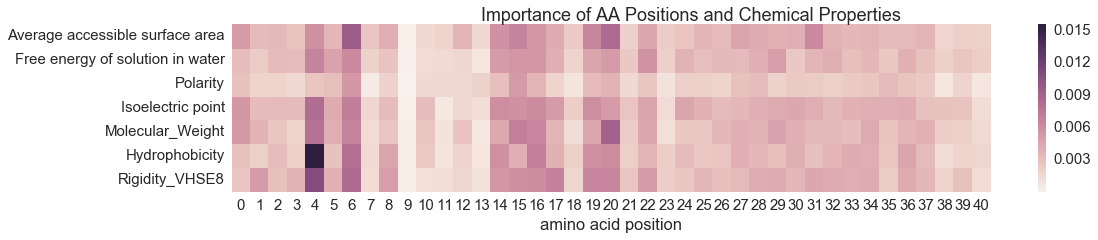

In [40]:
# print "important features are: \n", xgbc.feature_importances_.reshape([num_aa, num_chemprop])
imp_features = xgbc.feature_importances_.reshape([num_aa, num_chemprop])
imp_features = pd.DataFrame(imp_features).T
imp_features.index = aaindex_7.columns.tolist()

plt.rcParams['figure.figsize'] = (17, 3)
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.suptitle('Importance of AA Positions and Chemical Properties')
sns.heatmap(imp_features); ax1.set_xlabel('amino acid position')

In [41]:
# labels_test = np.array(labels_test)
idx_test_0 = labels_test == 0
print "True Label - Good  :", labels_test[idx_test_0][:10]
print "The prediction says:", xgbc.predict(features_test)[idx_test_0][:10]
print "The prediction prob:", xgbc.predict_proba(features_test)[idx_test_0][:10]
print ""
idx_test_1 = labels_test == 1
print "True Label - Bad   :", labels_test[idx_test_1][:10]
print "The prediction says:", xgbc.predict(features_test)[idx_test_1][:10]
print "The prediction prob:", xgbc.predict_proba(features_test)[idx_test_1][:10]

True Label - Good  : [0 0 0 0 0 0 0 0 0 0]
The prediction says: [1 0 0 0 1 0 1 0 1 1]
The prediction prob: [[ 0.35240304  0.64759696]
 [ 0.73139787  0.26860216]
 [ 0.72306132  0.27693865]
 [ 0.64800191  0.35199806]
 [ 0.0461176   0.9538824 ]
 [ 0.69444454  0.30555546]
 [ 0.45232183  0.54767817]
 [ 0.80561113  0.19438888]
 [ 0.39005452  0.60994548]
 [ 0.3764984   0.6235016 ]]

True Label - Bad   : [1 1 1 1 1 1 1 1 1 1]
The prediction says: [1 1 0 1 1 1 1 1 1 1]
The prediction prob: [[ 0.00458264  0.99541736]
 [ 0.00904483  0.99095517]
 [ 0.6709379   0.32906213]
 [ 0.0029332   0.9970668 ]
 [ 0.00294471  0.99705529]
 [ 0.00292981  0.99707019]
 [ 0.35621434  0.64378566]
 [ 0.00786704  0.99213296]
 [ 0.01465297  0.98534703]
 [ 0.00292981  0.99707019]]


## Visualize the Decision Trees

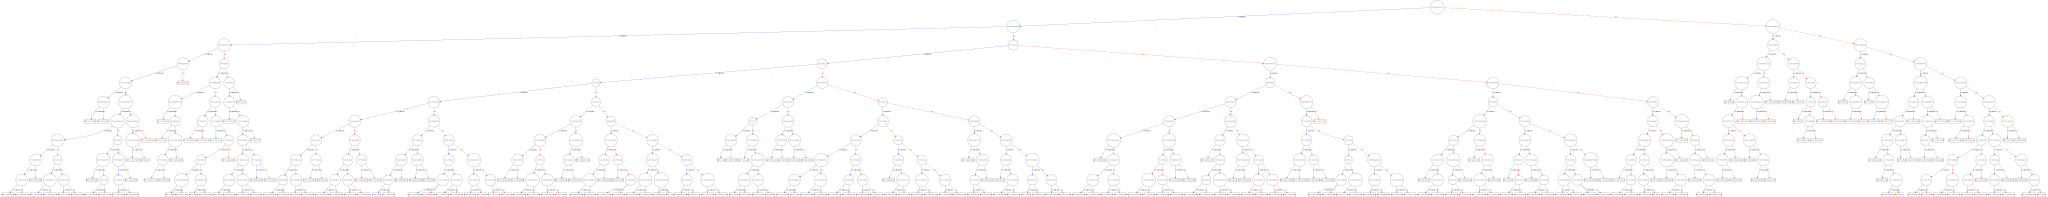

In [110]:
# need to install graphviz @ terminal: brew install graphviz
#pdf_file = '~/xgbc_trees.pdf'
#plot_tree(xgbc, num_trees=0)
#plt.show()

gvfile = '~/xgbc_trees.gv'
dot_data = xgb.to_graphviz(xgbc, num_trees=0)
dot_data.render(gvfile, view=False)
dot_data

## Tuning Hyperparameters via GridSearchCV

1. num trees & learning rate
2. Across all trees
    - subsampling rows
    - different loss function
3. Per tree
    - max depth
    - min sample to split a node
    - min sample in a leaf node
    - subsampling features

In [ ]:
# GridSearch for n_estimators and learning_rate first
cv_sets = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)
parameters = {'n_estimators':[1000, 2000], 'learning_rate':[0.01, 0.05]}

grid = GridSearchCV(xgbc, parameters, cv=cv_sets, scoring = 'roc_auc', n_jobs=3) # 'f1' scoring
# grid.fit(features_wCID_11_train_ds, labels_11_train_ds)
grid.fit(features_train, labels_train)
print("The best parameters are %s with AUC of %0.2f" % (grid.best_params_, grid.best_score_))
print grid.best_estimator_